# Parametric Morse Theory 

In [4]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import sys
sys.path.append("../src")
import networkx as nx
import numpy as np
import gudhi as gd
import numpy as np

from helpers import build_morse_function, stochastic_block_model
from discrete.core import critical_cells, is_morse_type, hasse_diagram, gradient
from parametric.core import parametric_pipeline, abstract_diagram, parametric_coordinates
from visualization import plotly_persistence_diagram

### The circle in eight vertices

In this first part, we run the example of the triangulated circle introduced in the paper <i>Parametric Morse Theory</i> (cf. "A simple example" page 8).

In [5]:
S = nx.Graph()
for i in range(1,8):
    S.add_node(i)
    S.add_edge(i,i+1)
S.add_edge(1,8)

K = gd.SimplexTree()
edges = S.edges
for e in edges:
    K.insert(list(e))

C = [[[5],[1,2]],
     [[7],[4,5]],
     [[5],[7],[5,6],[1,2]],
     [[1],[5],[3,4],[7,8]],
     [[8],[5,6]],
     [[4],[7,8]],
     [[1],[6],[2,3],[7,8]],
     [[5],[4,5]]]

V = [[[[1],[1,8]],[[8],[7,8]],[[7],[6,7]],[[6],[5,6]],[[4],[4,5]],[[3],[3,4]],[[2],[2,3]]],
     [[[1],[1,8]],[[8],[7,8]],[[6],[6,7]],[[5],[5,6]],[[4],[3,4]],[[3],[2,3]],[[2],[1,2]]],
     [[[1],[1,8]],[[8],[7,8]],[[6],[6,7]],[[4],[4,5]],[[3],[3,4]],[[2],[2,3]]],
     [[[8],[1,8]],[[7],[6,7]],[[6],[5,6]],[[4],[4,5]],[[3],[2,3]],[[2],[1,2]]],
     [[[1],[1,8]],[[7],[7,8]],[[6],[6,7]],[[5],[4,5]],[[4],[3,4]],[[3],[2,3]],[[2],[1,2]]],
     [[[8],[1,8]],[[7],[6,7]],[[6],[5,6]],[[5],[4,5]],[[3],[3,4]],[[2],[2,3]],[[1],[1,2]]],
     [[[8],[1,8]],[[7],[6,7]],[[5],[5,6]],[[4],[4,5]],[[3],[3,4]],[[2],[1,2]]],
     [[[1],[1,8]],[[8],[7,8]],[[7],[6,7]],[[6],[5,6]],[[4],[3,4]],[[3],[2,3]],[[2],[1,2]]]]

In [6]:
G = abstract_diagram(K,V,C)

In [7]:
colors = ['orange', 'skyblue', 'red', 'greenyellow', 'violet', 'cyan', 'peru', 'crimson']
color_map = []

for node in G:
    for i in range(8):
        if G.nodes[node]['index'][1]==i:
            color_map.append(colors[i])

In [8]:
labeldict = {}
for node in G.nodes:
    labeldict[node] = str(G.nodes[node]['index'][0])

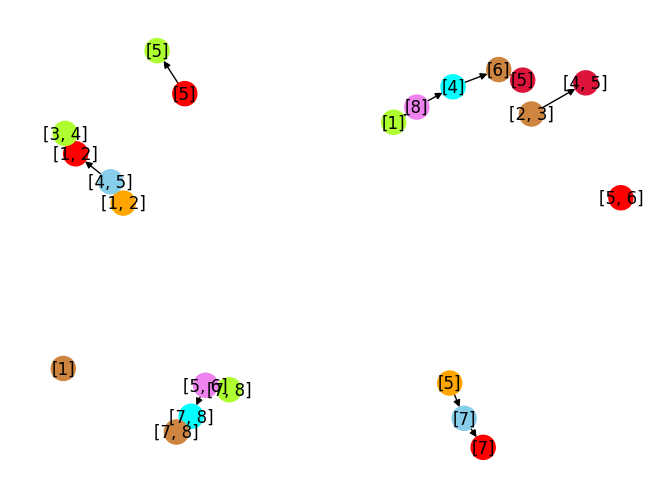

In [9]:
nx.draw(G, node_color=color_map, labels=labeldict, with_labels=True)

In [10]:
p = parametric_coordinates(K,V,C)

In [11]:
x = [life[0] for life in p[0]]
y = [life[1] for life in p[0]]
d = np.linspace(0,10,1000)

In [12]:
plotly_persistence_diagram(coordinates=p[1])

### Running the whole pipeline

We define the sampling process parameters.

In [13]:
g1 = lambda x: np.cos(2*x)
g2 = lambda x: np.sin(3*x)
g3 = lambda x: 4 * np.cos(x)
g4 = lambda x: (np.sin(x))**2
g5 = lambda x: np.cos(x)
g6 = lambda x: np.sin(2*x)

In [15]:
functions = [g1, g2, g3, g4, g5, g1, g1, g1]
start = 0
count = 8
time_step = 5
noise = 0.05
pert_count = 20
perturbation = 0.001

In [16]:
P = parametric_pipeline(S, functions = [g1,g1,g1,g1,g2,g2,g2,g2], start = 0, time_step = 0.05, count = 12, noise=0.05)

In [19]:
plotly_persistence_diagram(p[1])

### The tetrahedron

In [20]:
T = nx.Graph()
for i in range(1,3):
    T.add_node(i)
    T.add_edge(i,i+1)
T.add_edge(1,3)
T.add_node(4)
T.add_edges_from([(1,4), (2,4), (3,4)])

In [22]:
p_tetra = parametric_pipeline(T, functions = 4 * [g1], start = 0, time_step = 0.05, count = 12, noise=0.05)

In [23]:
plotly_persistence_diagram(p_tetra[1])

### The circle as a triangle

In [24]:
circle = nx.Graph()
circle.add_edge(1,2)
circle.add_edge(2,3)
circle.add_edge(3,1)

In [26]:
p_circle = parametric_pipeline(circle, functions = [g1, g2, g3], start = 0, time_step = 0.05, count = 12, noise=0.05)

In [27]:
plotly_persistence_diagram(p_circle[1])

### The stochastic block model

In [28]:
stoch = stochastic_block_model(n=24, p=0.8, q=0.05, k=4)

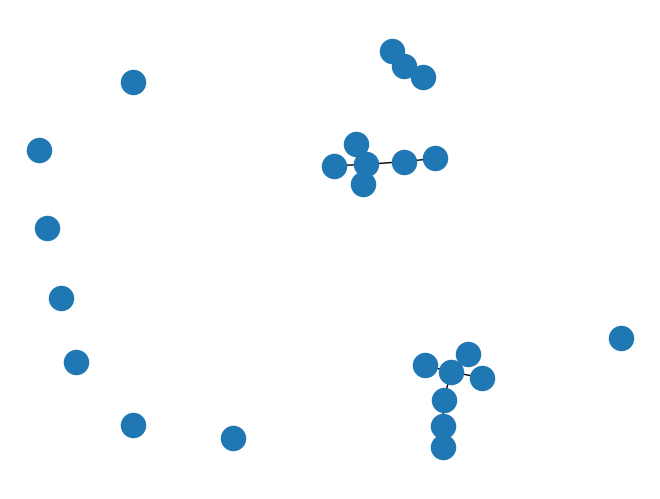

In [29]:
nx.draw(stoch)

In [34]:
p_stoch = parametric_pipeline(G=stoch,
                              functions=4 * [g1,g2,g3,g4,g5,g6],
                              start=0,
                              time_step=0.05,
                              count=12,
                              noise=0.05)

In [35]:
plotly_persistence_diagram(p_stoch[1])